In [0]:
!pip install yfinance

     |████████████████████████████████| 59 kB 4.6 MB/s 
     |████████████████████████████████| 499 kB 6.3 MB/s 
     |████████████████████████████████| 112 kB 78.1 MB/s 
     |████████████████████████████████| 112 kB 75.7 MB/s 
  Attempting uninstall: pytz
    Found existing installation: pytz 2021.3
    Not uninstalling pytz at /databricks/python3/lib/python3.9/site-packages, outside environment /local_disk0/.ephemeral_nfs/envs/pythonEnv-da28a39a-4dd3-48a3-8ab8-7a46a940b886
    Can't uninstall 'pytz'. No files were found to uninstall.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
mleap 0.20.0 requires scikit-learn<0.23.0,>=0.22.0, but you have scikit-learn 1.0.2 which is incompatible.
You should consider upgrading via the '/local_disk0/.ephemeral_nfs/envs/pythonEnv-da28a39a-4dd3-48a3-8ab8-7a46a940b886/bin/python -m pip install --upgrade pip' command.


In [0]:
import yfinance as yf
import pandas as pd
from datetime import datetime

def get_stock_prices(symbol, start_date, end_date):
    stock_data = yf.download(symbol, start=start_date, end=end_date)
    stock_data = stock_data[['Open', 'High', 'Low', 'Close', 'Volume']]
    return stock_data
  
# set the stock symbol and date range
symbol = "AAPL"
start_date = datetime(2021, 1, 1)
end_date = datetime(2021, 12, 31)

# get the stock prices
df = get_stock_prices(symbol, start_date, end_date)

# print the dataframe
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Volume
Date,,,,,
2021-01-04,133.520004,133.610001,126.760002,129.410004,143301900
2021-01-05,128.889999,131.740005,128.429993,131.009995,97664900
2021-01-06,127.720001,131.050003,126.379997,126.599998,155088000
2021-01-07,128.360001,131.630005,127.860001,130.919998,109578200
2021-01-08,132.429993,132.630005,130.229996,132.050003,105158200


In [0]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

def get_multiple_stock_prices(symbols,start_date, end_date):
    stock_data = pd.DataFrame()
    
    for symbol in symbols:
        stock_prices = yf.download(symbol, start=start_date, end=end_date)
        stock_prices = stock_prices[['Close']]
        stock_prices.columns = [symbol]
        stock_data = pd.concat([stock_data, stock_prices], axis=1)
        
    return stock_data

def plot_multiple_stock_prices(symbols, start_date, end_date):
    stock_data = get_multiple_stock_prices(symbols, start_date, end_date)
    stock_data.plot(figsize=(16, 12))
    plt.title('Stock Prices of AAPL, MSFT, TSLA')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.show()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


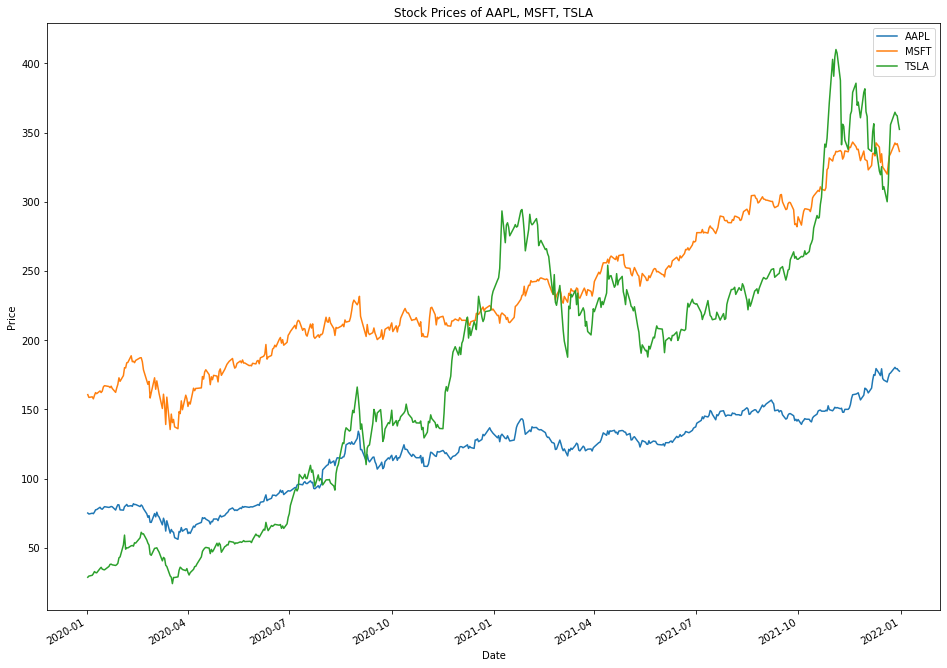

In [0]:
symbols = ['AAPL', 'MSFT', 'TSLA']
plot_multiple_stock_prices(symbols, '2020-01-01', '2022-01-01')

In [0]:
import pandas as pd
import plotly.graph_objs as go
import yfinance as yf

def get_multiple_stock_prices(symbols, start_date, end_date):
    stock_data = pd.DataFrame()
    for symbol in symbols:
        data = yf.download(symbol, start=start_date, end=end_date)
        data = data[['Open', 'High', 'Low', 'Close', 'Volume']]
        data.columns = [symbol + ' ' + col for col in data.columns]
        stock_data = pd.concat([stock_data, data], axis=1)
    return stock_data

def plot_multiple_stock_prices(symbols, start_date, end_date):
    stock_data = get_multiple_stock_prices(symbols, start_date, end_date)
    fig = go.Figure()
    for symbol in symbols:
        fig.add_trace(go.Scatter(x=stock_data.index, y=stock_data[symbol + ' Close'], name=symbol))
    fig.update_layout(title='Stock Prices of {}'.format(', '.join(symbols)),
                      xaxis_title='Date',
                      yaxis_title='Price',
                      width=800,
                      height=600)
    fig.show()

In [0]:
symbols = ['AAPL', 'MSFT', 'TSLA']
start_date = '2022-01-01'
end_date = '2022-03-01'

plot_multiple_stock_prices(symbols, start_date, end_date)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
